# I am taking this project because...

* I have seen this data is so clear and got me attracted to find some insights.
* I want to explrore the insights from the data
* I also want to try other models to get the accuracy - as it is the classification task available options are:
    - KNN
    - Random Forest
    - SVM
    - ( Ignoring others )
    
**Let's see what happens...**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')

In [2]:
college = pd.read_csv('College_Data', index_col= 0)

In [4]:
college

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

Pre Data Information:
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [5]:
college

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

### Here I see:

* There seems a nice correlation in `Apps, Accept, Enroll`
* In such college where *Fulltime students* and *Parttime students* cause an impect on the Graduation Rate
* Student and Faculty ratio should also be considered ( and seen after seperating them into two columns )
* Look for in Private or Non-Private college, the number or `PhD` faculties ( and also check for their impact on the Grad Rate )
* **Toppers** related to the Grad Rate
* Is Expenditure per student more in Private and if yes then what amount of students are applying in that college which has more or less Expend...

In [9]:
college.isna().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

# 

## • There seems a nice correlation in `Apps, Accept, Enroll`

(0.0, 10000.0)

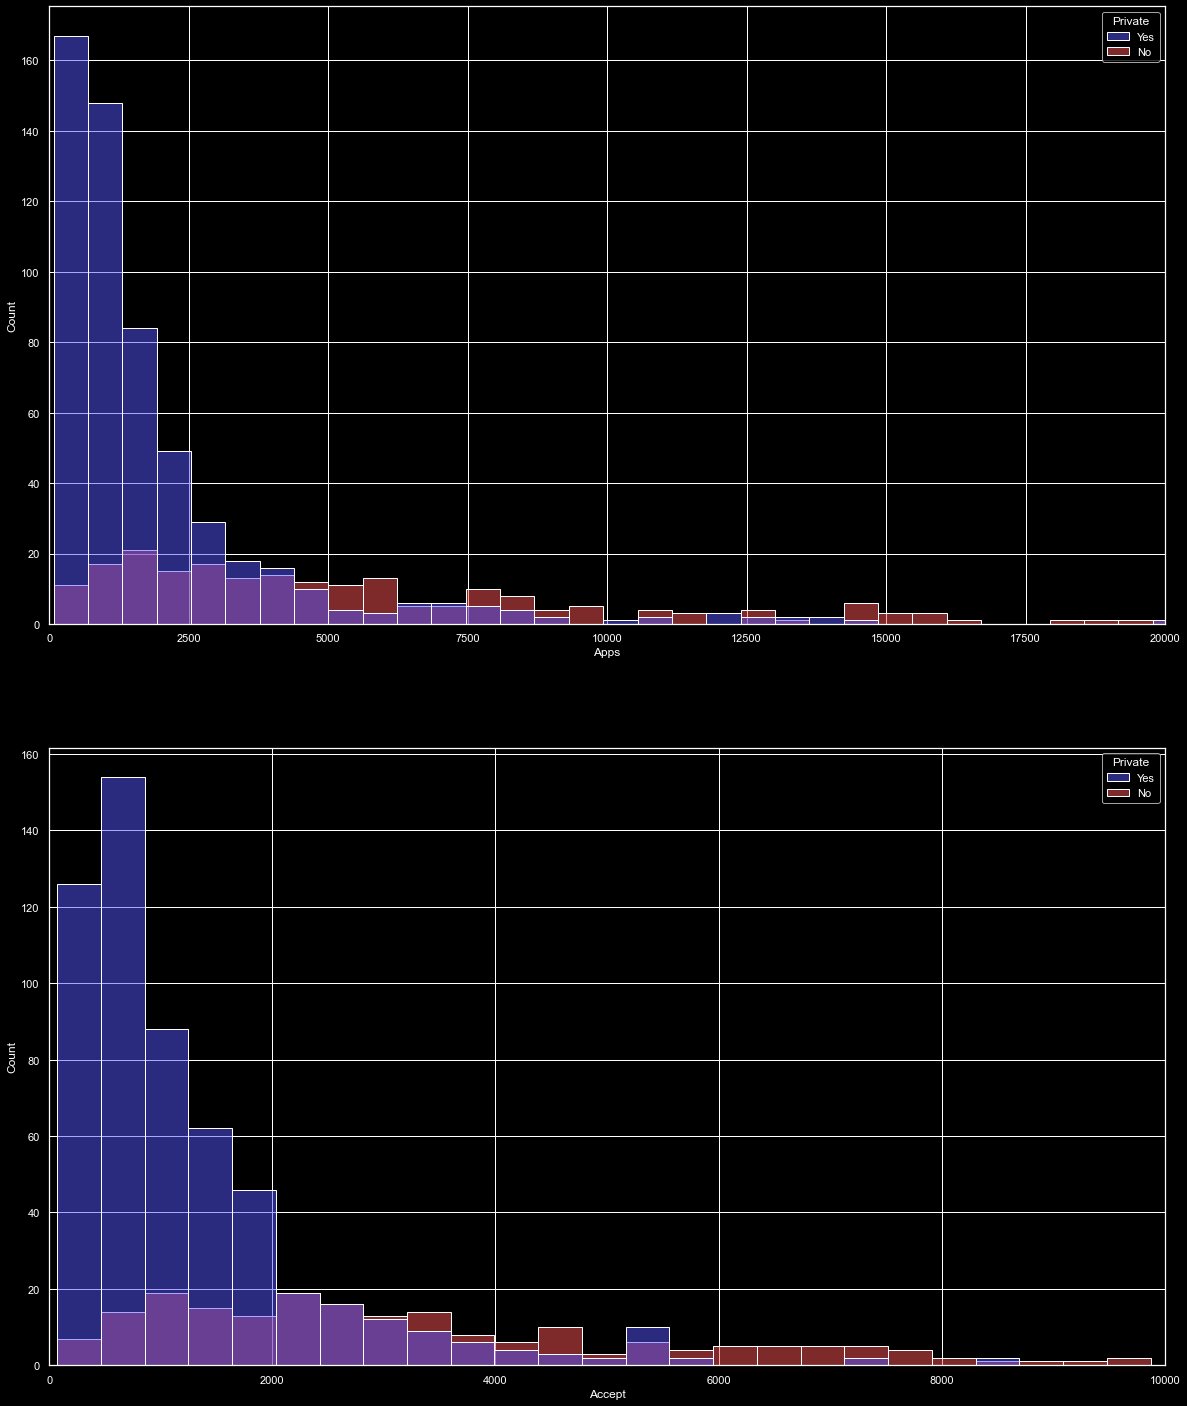

In [20]:
fig, axes = plt.subplots(2, 1, figsize= (20, 25))

sns.histplot(x= 'Apps', data= college, hue= 'Private', palette= 'seismic', ax= axes[0])
axes[0].set_xlim([0, 20000])

sns.histplot(x= 'Accept', data= college, hue= 'Private', palette= 'seismic', ax= axes[1])
axes[1].set_xlim([0, 10000])

(0.0, 10000.0)

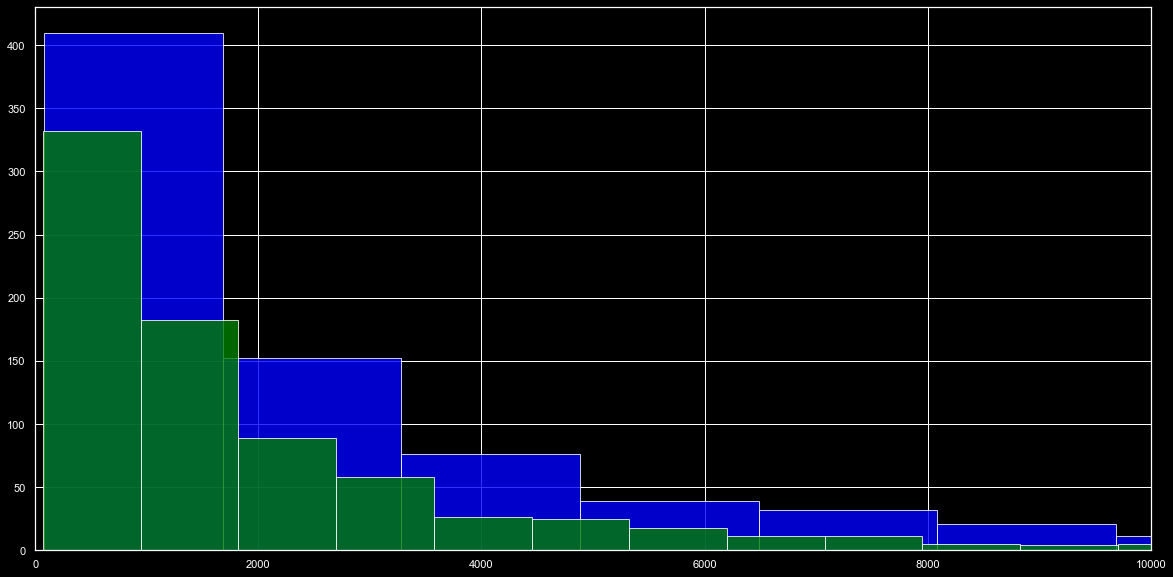

In [33]:
plt.hist(college['Apps'], color= 'blue', bins= 30, alpha= 0.8);
plt.hist(college['Accept'], color= 'green', bins= 30, alpha= 0.8);

plt.xlim([0, 10000])

# The ratio of Apps vs Accepted:

In [35]:
college[ college['Private'] == 'Yes' ]['Apps'].mean()

1977.929203539823

In [36]:
college[ college['Private'] == 'Yes' ]['Accept'].mean()

1305.7026548672566

In [38]:
(college[ college['Private'] == 'Yes' ]['Accept'].mean() * 100) / college[ college['Private'] == 'Yes' ]['Apps'].mean()

66.01361932118154

In [40]:
college[ college['Private'] == 'Yes' ]['Grad.Rate'].mean()

68.99823008849557

### `66:34` ratio of Apps and Acceptance in Private colleges which has the mean grad rate: `68.99823008849557`

In [41]:
(college[ college['Private'] == 'No' ]['Accept'].mean() * 100) / college[ college['Private'] == 'No' ]['Apps'].mean()

68.4003941574473

In [42]:
college[ college['Private'] == 'No' ]['Grad.Rate'].mean()

56.04245283018868

### `68:32` ratio of Apps and Acceptance in Non-Private colleges which has the mean grad rate: `56.04245283018868`

# 

## Now, I want to see, in which colleges the grad rate is above 90% and what is the distribution of Apps and Accept in them...

In [44]:
above_90 = college[college['Grad.Rate'] > 90]
above_90

Private   Apps  Accept  Enroll  Top10perc  \
Amherst College                  Yes   4302     992     418         83   
Barnard College                  Yes   2496    1402     531         53   
Bowdoin College                  Yes   3356    1019     418         76   
Brown University                 Yes  12586    3239    1462         87   
Bucknell University              Yes   6548    3813     862         49   
...                              ...    ...     ...     ...        ...   
Wesleyan University              Yes   4772    1973     712         60   
Williams College                 Yes   4186    1245     526         81   
Wingate College                  Yes   1239    1017     383         10   
Yale University                  Yes  10705    2453    1317         95   
York College of Pennsylvania     Yes   2989    1855     691         28   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Amherst College                      96         1593            5     19760   
Barnard College                      95         2121           69     17926   
Bowdoin College                     100         1490            8     19030   
Brown University                     95         5643          349     19528   
Bucknell University                  85         3316           31     18550   
...                                 ...          ...          ...       ...   
Wesleyan University                  86         2714           27     19130   
Williams College                     96         1988           29     19629   
Wingate College                      34         1207          157      7820   
Yale University                      99         5217           83     19840   
York College of Pennsylvania         63         2988         1726      4990   

                              Room.Board  Books  Personal  PhD  Terminal  \
Amherst College                     5300    660      1598   93        98   
Barnard College                     8124    600       850   83        93   
Bowdoin College                     5885   1495       875   93        96   
Brown University                    5926    720      1100   99       100   
Bucknell University                 4750    800      1200   95        97   
...                                  ...    ...       ...  ...       ...   
Wesleyan University                 5600   1400      1400   90        94   
Williams College                    5790    500      1200   94        99   
Wingate College                     3400    550      1550   69        81   
Yale University                     6510    630      2115   96        96   
York College of Pennsylvania        3560    500      1250   75        75   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Amherst College                     8.4           63   21424        100  
Barnard College                    10.3           33   12580         91  
Bowdoin College                    11.2           52   20447         96  
Brown University                    7.6           39   20440         97  
Bucknell University                14.2           36   13675         93  
...                                 ...          ...     ...        ...  
Wesleyan University                12.1           39   16262         92  
Williams College                    9.0           64   22014         99  
Wingate College                    13.9            8    7264         91  
Yale University                     5.8           49   40386         99  
York College of Pennsylvania       18.1           28    4509         99  

[64 rows x 18 columns]

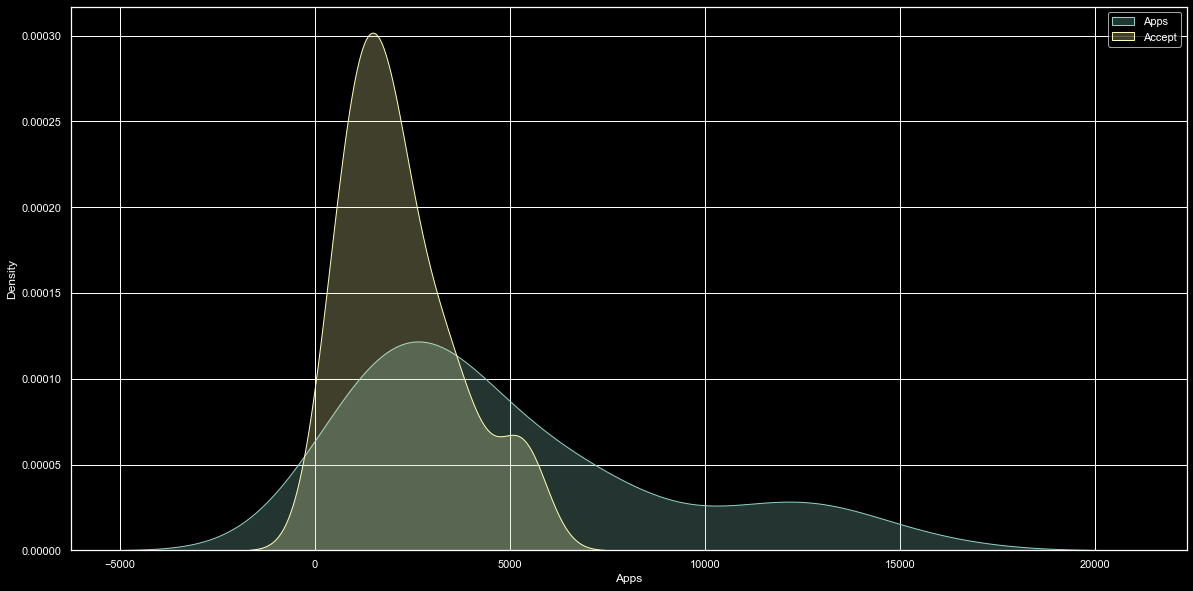

In [48]:
sns.kdeplot(x= 'Apps', data= above_90, fill= True, label= "Apps")
sns.kdeplot(x= 'Accept', data= above_90, fill= True, label= "Accept")
plt.legend()

## Here, Apps to Accept ratio is...

In [49]:
(college[ college['Grad.Rate'] > 90 ]['Accept'].mean() * 100) / college[ college['Grad.Rate'] > 90 ]['Apps'].mean()

44.748762913722544

So, there is only `44%` of acceptance in those colleges where the Grad rate is higher than 90%.

That means, these colleges can be difficult to get in and are providing the quality content to the students. The students tend to be talented as well.

In [52]:
(college[ college['Grad.Rate'] < 90 ]['Accept'].mean() * 100) / college[ college['Grad.Rate'] < 90 ]['Apps'].mean()

71.11105835862087

And other colleges which are having less than 90% grad rate, are having 71% of acceptance.

List of those colleges, which are having the grad rate > 90.

In [61]:
colleges_90 = college[college['Grad.Rate'] > 90].index
colleges_90

Index(['Amherst College', 'Barnard College', 'Bowdoin College',
       'Brown University', 'Bucknell University', 'Carleton College',
       'Cazenovia College', 'Colby College', 'Colgate University',
       'College Misericordia', 'College of Mount St. Joseph',
       'College of the Holy Cross', 'College of William and Mary',
       'Columbia University', 'Connecticut College', 'Dartmouth College',
       'Davidson College', 'Duke University', 'Emory University',
       'Fairfield University', 'Georgetown University', 'Grove City College',
       'Gwynedd Mercy College', 'Hamilton College', 'Harvard University',
       'Harvey Mudd College', 'Incarnate Word College',
       'James Madison University', 'Lafayette College', 'Le Moyne College',
       'Lehigh University', 'Lindenwood College', 'Livingstone College',
       'Marietta College', 'Massachusetts Institute of Technology',
       'Mercer University', 'Missouri Southern State College',
       'Northwestern University', 'Princet

## What is their faculty situation?

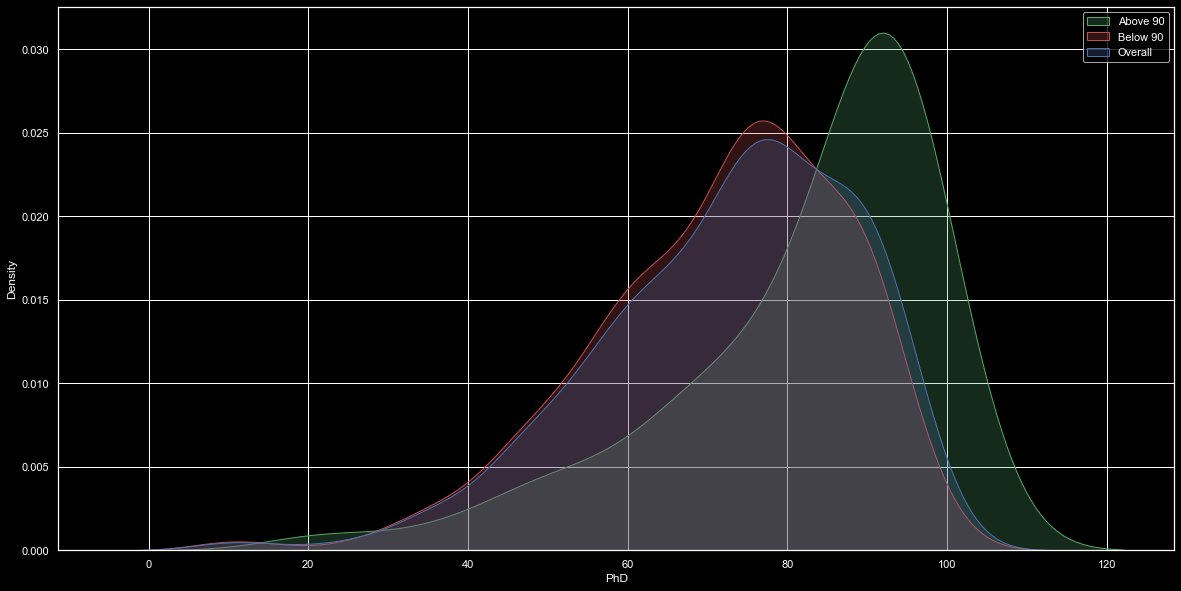

In [77]:
sns.kdeplot(x= 'PhD', data= college[college['Grad.Rate'] > 90], fill= True, label= "Above 90", color= 'g')
sns.kdeplot(x= 'PhD', data= college[college['Grad.Rate'] < 90], fill= True, label= "Below 90", color= 'r')
sns.kdeplot(x= 'PhD', data= college, fill= True, label= "Overall", color= 'b')

plt.legend()

It seems like, the PhD faculties are affecting the Grad Rate somehow...

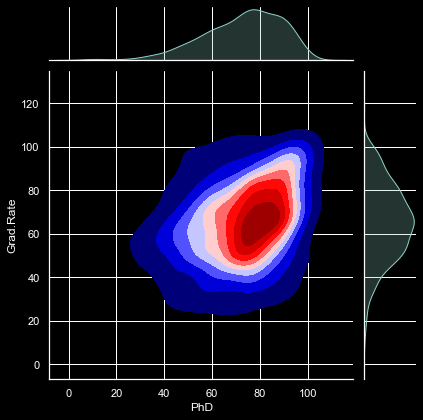

In [91]:
sns.jointplot(x= 'PhD', y= 'Grad.Rate', data= college, kind= 'kde', fill= True, cmap= 'seismic')

### Now, what is the situation of the Books in those colleges?

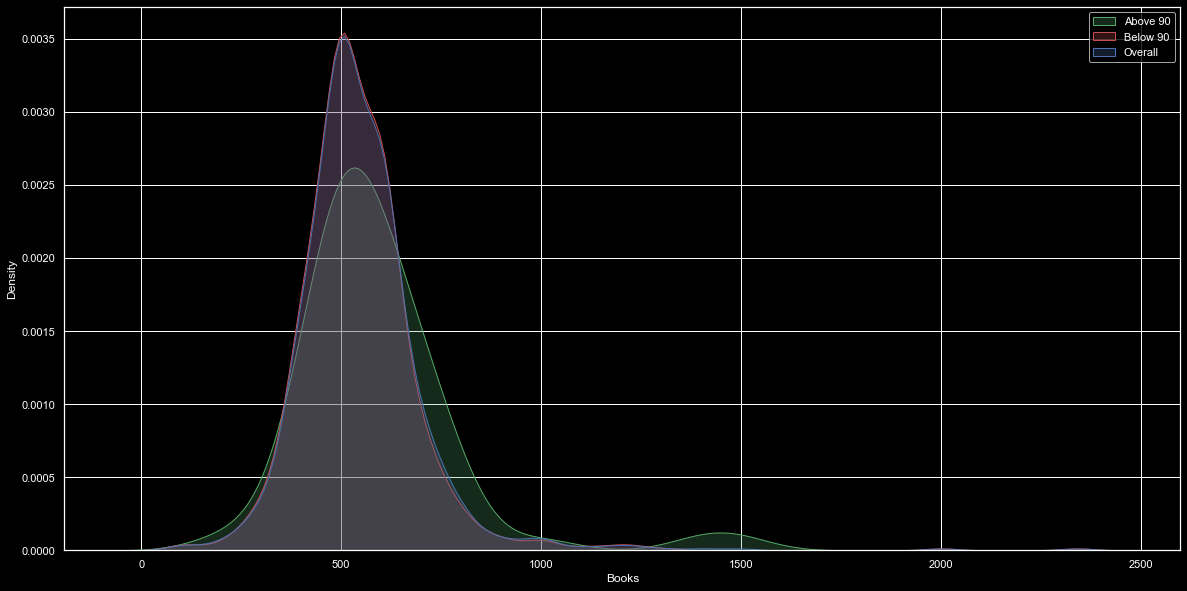

In [96]:
sns.kdeplot(x= 'Books', data= college[college['Grad.Rate'] > 90], fill= True, label= "Above 90", color= 'g')
sns.kdeplot(x= 'Books', data= college[college['Grad.Rate'] < 90], fill= True, label= "Below 90", color= 'r')
sns.kdeplot(x= 'Books', data= college, fill= True, label= "Overall", color= 'b')

plt.legend()

Oh, the number of books is not that effective in raising the grad rate... it may be the exact books the students need or it is purely teachings.

And, also there is the peak arount ~ 1500 in books, which is for the Above 90 grad colleges only. Do note that. That also means more books are available in those colleges.

In [98]:
college[ college['Books'] > 1000 ]

Private  Apps  Accept  Enroll  Top10perc  \
Bowdoin College                      Yes  3356    1019     418         76   
Bradley University                   Yes  3767    3414    1061         30   
Center for Creative Studies          Yes   601     396     203          1   
MidAmerica Nazarene College          Yes   331     331     225         15   
Rensselaer Polytechnic Institute     Yes  4996    4165     936         53   
Savannah Coll. of Art and Design     Yes  1109     688     386         20   
SUNY College at Purchase              No  2119    1264     390          5   
University of the Arts               Yes   974     704     290          5   
University of Tulsa                  Yes  1712    1557     696         41   
Wesleyan University                  Yes  4772    1973     712         60   

                                  Top25perc  F.Undergrad  P.Undergrad  \
Bowdoin College                         100         1490            8   
Bradley University                       58         4531          643   
Center for Creative Studies              20          525          323   
MidAmerica Nazarene College              36         1100          166   
Rensselaer Polytechnic Institute         82         4291           16   
Savannah Coll. of Art and Design         65         1897          208   
SUNY College at Purchase                 33         2478         1441   
University of the Arts                   22         1145           39   
University of Tulsa                      68         2936          433   
Wesleyan University                      86         2714           27   

                                  Outstate  Room.Board  Books  Personal  PhD  \
Bowdoin College                      19030        5885   1495       875   93   
Bradley University                   10870        4440   2000      1522   75   
Center for Creative Studies          11230        6643   2340       620    8   
MidAmerica Nazarene College           6840        3720   1100      4913   33   
Rensselaer Polytechnic Institute     17475        5976   1230      1100   94   
Savannah Coll. of Art and Design      8325        5000   1200      1600   14   
SUNY College at Purchase              6550        4760   1125      1362   80   
University of the Arts               12520        3860   1300       700   16   
University of Tulsa                  11750        4160   1200      2350   94   
Wesleyan University                  19130        5600   1400      1400   90   

                                  Terminal  S.F.Ratio  perc.alumni  Expend  \
Bowdoin College                         96       11.2           52   20447   
Bradley University                      81       14.4           21    7671   
Center for Creative Studies             58        6.8            4   13025   
MidAmerica Nazarene College             33       15.4           20    5524   
Rensselaer Polytechnic Institute        98       15.4           21   15605   
Savannah Coll. of Art and Design        98       16.1           26    6874   
SUNY College at Purchase               100       14.9            8    8170   
University of the Arts                  59        7.5            9   11641   
University of Tulsa                     96       11.5           10   11743   
Wesleyan University                     94       12.1           39   16262   

                                  Grad.Rate  
Bowdoin College                          96  
Bradley University                       85  
Center for Creative Studies              47  
MidAmerica Nazarene College              49  
Rensselaer Polytechnic Institute         70  
Savannah Coll. of Art and Design         55  
SUNY College at Purchase                 46  
University of the Arts                   57  
University of Tulsa                      47  
Wesleyan University                      92

### 

## Some view on Books situation...

<AxesSubplot:xlabel='Books', ylabel='Density'>

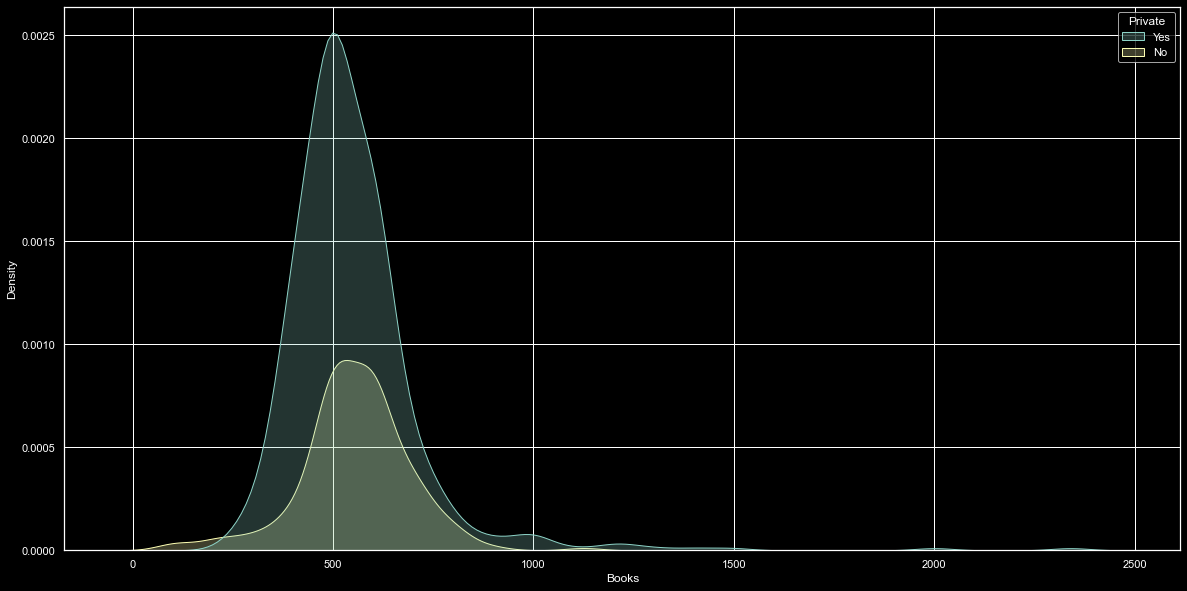

In [103]:
sns.kdeplot(x= 'Books', data= college, fill= True, hue= 'Private')

### Oh, Non-Private colleges are not having good infrastructure for the books and the number of books is way lower than the Private one...

In [109]:
college[(college['Private'] == 'No') & (college['Books'] > 700)]['Grad.Rate'].mean()

54.9

In [110]:
college[(college['Private'] == 'Yes') & (college['Books'] > 700)]['Grad.Rate'].mean()

71.02272727272727

## • In such college where Fulltime students and Parttime students cause an impect on the Graduation Rate

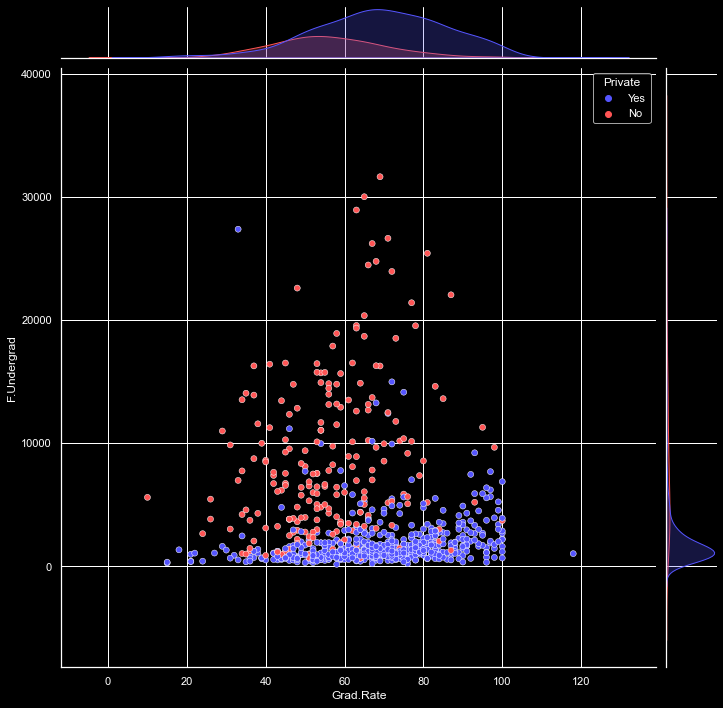

In [131]:
sns.jointplot(x= 'Grad.Rate', y= 'F.Undergrad', data= college, hue= 'Private', palette= 'seismic', height= 10, ratio= 10)

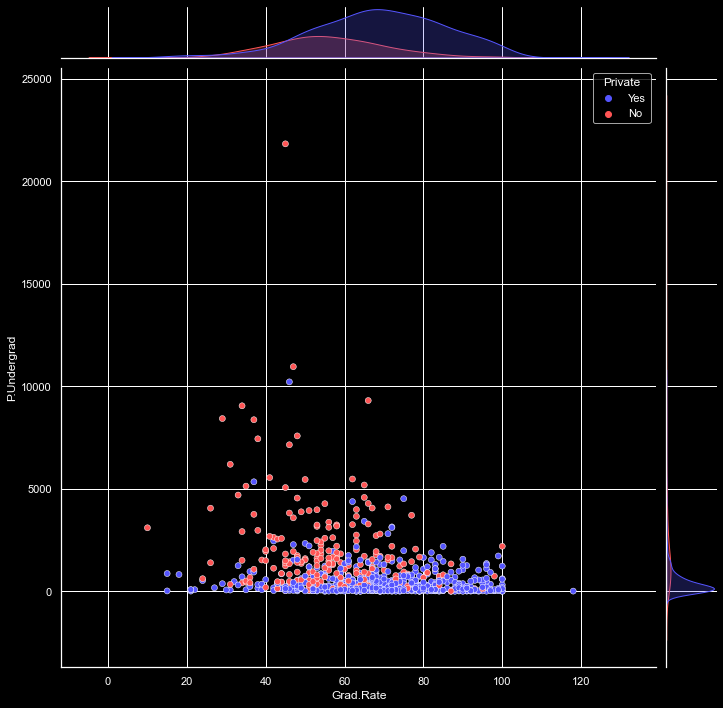

In [132]:
sns.jointplot(x= 'Grad.Rate', y= 'P.Undergrad', data= college, hue= 'Private', palette= 'seismic', height= 10, ratio= 10)

## It seems like, P/F Undergraduation is not related with the Grad.Rate

<AxesSubplot:xlabel='F.Undergrad', ylabel='Count'>

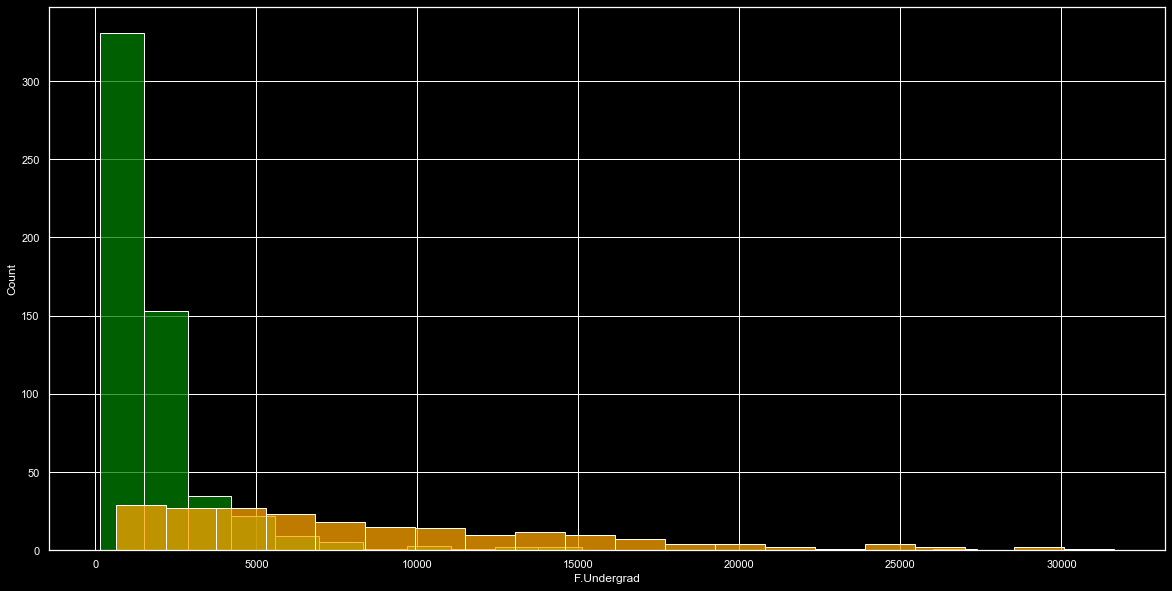

In [142]:
sns.histplot(x= 'F.Undergrad', data= college[ college['Private'] == 'Yes' ], bins= 20, color= 'green')
sns.histplot(x= 'F.Undergrad', data= college[ college['Private'] == 'No' ], bins= 20, color= 'orange')

Full time grads are more in the Non-Private

# 

# • Student and Faculty ratio should also be considered ( and seen after seperating them into two columns )

In [144]:
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
college['Student_ratio'] = college['S.F.Ratio'].apply(lambda x: int(str(x).split('.')[0]))
college['Teacher_ratio'] = college['S.F.Ratio'].apply(lambda x: int(str(x).split('.')[1]))

In [5]:
college

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Abilene Christian University         18.1           12    7041         60   
Adelphi University                   12.2           16   10527         56   
Adrian College                       12.9           30    8735         54   
Agnes Scott College                   7.7           37   19016         59   
Alaska Pacific University            11.9            2   10922         15   
...                                   ...          ...     ...        ...   
Worcester State College              21.0           14    4469         40   
Xavier University                    13.3           31    9189         83   
Xavier University of Louisiana       14.4           20    8323         49   
Yale University                       5.8           49   40386         99   
York College of Pennsylvania         18.1           28    4509         99   

                                Student_ratio  Teacher_ratio  
Abilene Christian University               18              1  
Adelphi University                         12              2  
Adrian College                             12              9  
Agnes Scott College            

In [151]:
college.drop(['S.F.Ratio'], axis= 1, inplace= True)

In [153]:
college

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                perc.alumni  Expend  Grad.Rate  Student_ratio  \
Abilene Christian University             12    7041         60             18   
Adelphi University                       16   10527         56             12   
Adrian College                           30    8735         54             12   
Agnes Scott College                      37   19016         59              7   
Alaska Pacific University                 2   10922         15             11   
...                                     ...     ...        ...            ...   
Worcester State College                  14    4469         40             21   
Xavier University                        31    9189         83             13   
Xavier University of Louisiana           20    8323         49             14   
Yale University                          49   40386         99              5   
York College of Pennsylvania             28    4509         99             18   

                                Teacher_ratio  
Abilene Christian University                1  
Adelphi University                          2  
Adrian College                              9  
Agnes Scott College                        

<AxesSubplot:xlabel='Student_ratio', ylabel='Teacher_ratio'>

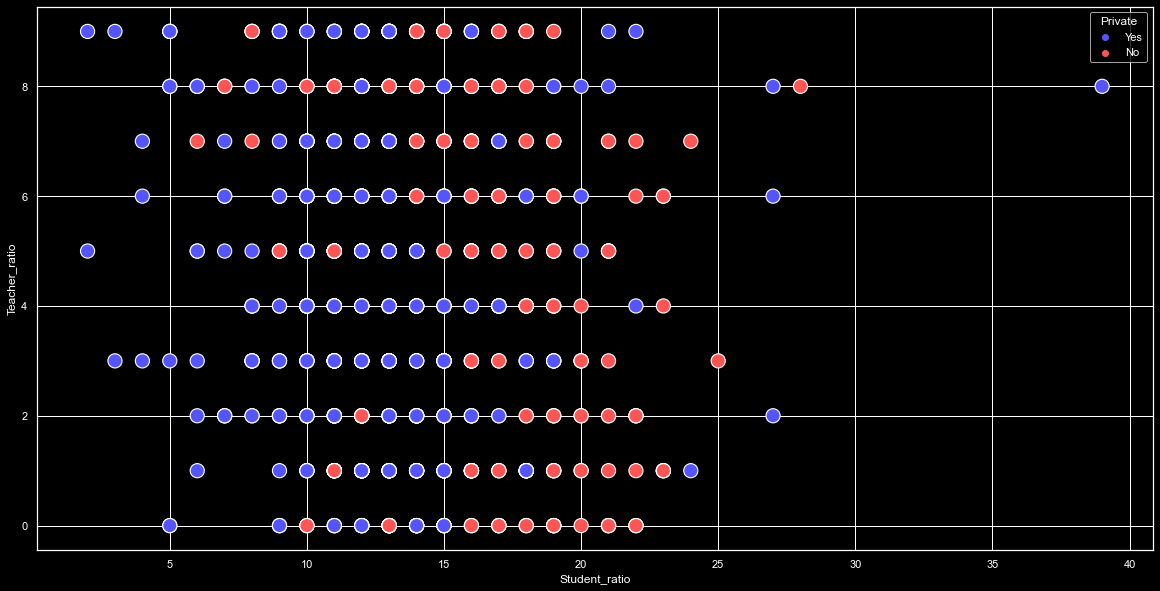

In [170]:
plt.figure(figsize= (20, 10))
sns.scatterplot(x= 'Student_ratio', y= 'Teacher_ratio', data= college, color= 'red', s= 200, hue= 'Private', palette= 'seismic')

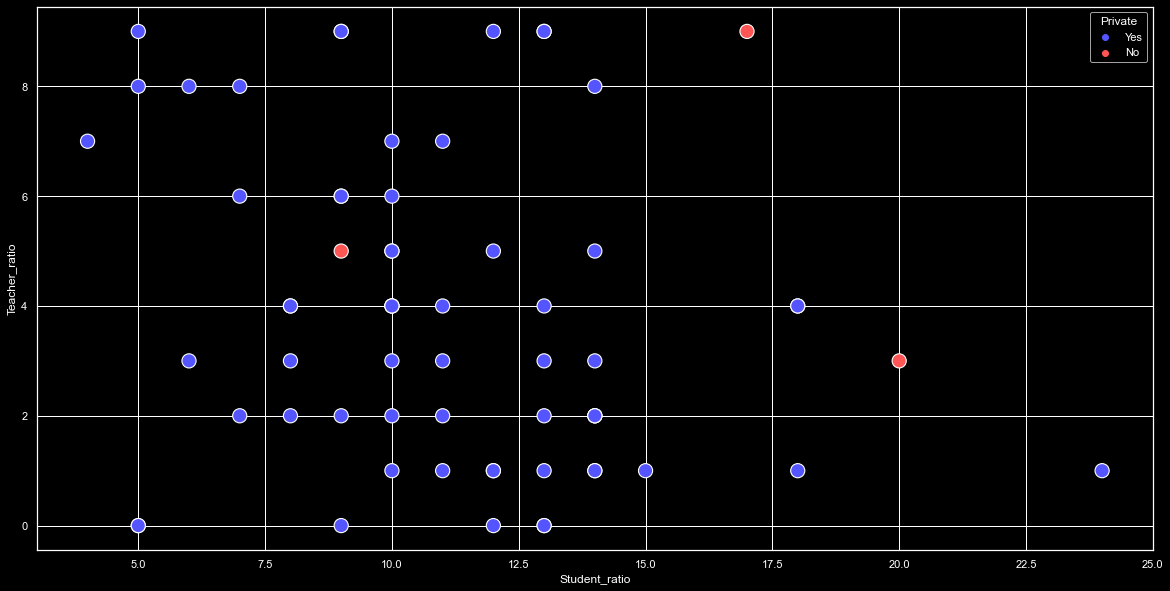

In [174]:
plt.figure(figsize= (20, 10))
sns.scatterplot(x= 'Student_ratio', y= 'Teacher_ratio', data= college[college['Grad.Rate'] > 90], color= 'red', s= 200, hue= 'Private', palette= 'seismic')

In [184]:
above_90 = college[college['Grad.Rate'] > 90]

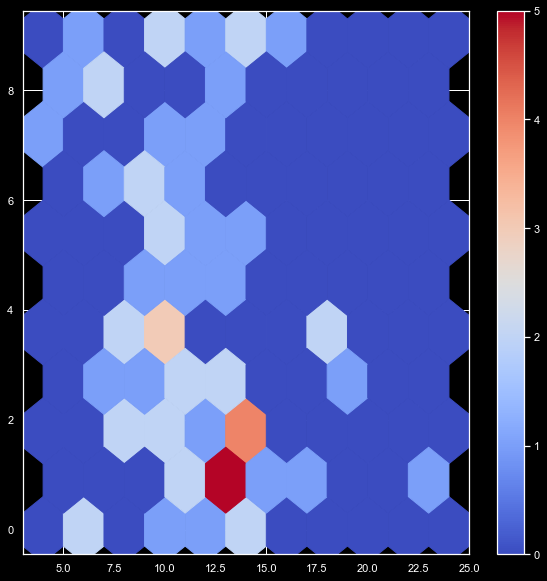

In [198]:
plt.figure(figsize= (10, 10))
plt.hexbin(above_90['Student_ratio'], above_90['Teacher_ratio'], gridsize= 10, cmap= "coolwarm")
plt.colorbar()

### It seems that ~1-3 teachers per ~10-15 students are more in getting above 90%

### 

# • What about toppers?

<AxesSubplot:xlabel='Top25perc', ylabel='Count'>

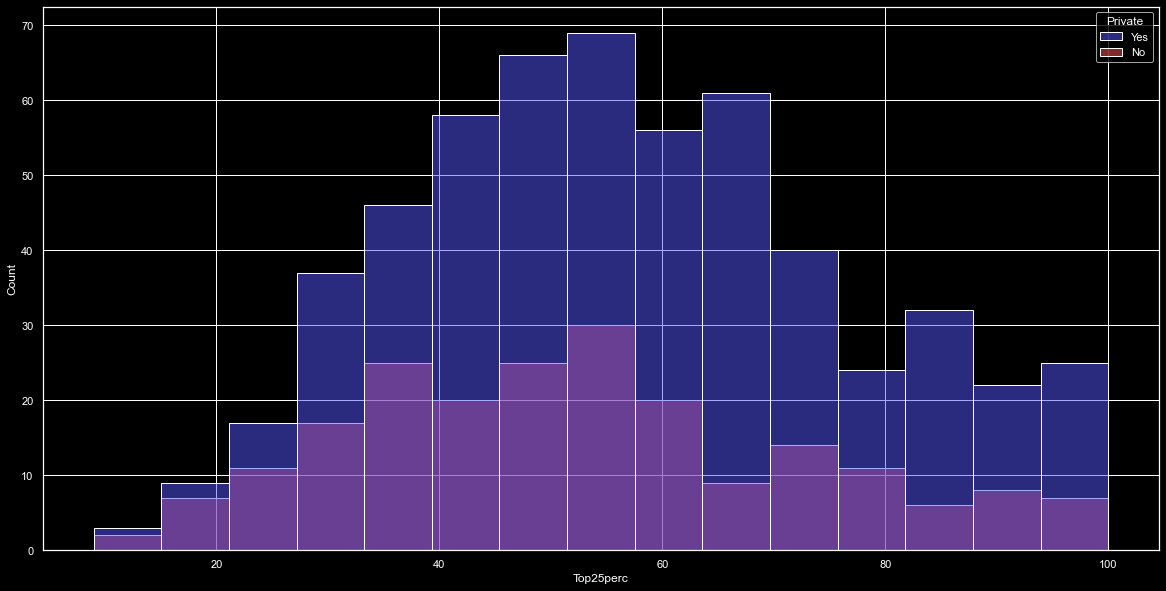

In [208]:
sns.histplot(x= 'Top25perc', data= college, hue= 'Private', palette= 'seismic')

<AxesSubplot:xlabel='Top10perc', ylabel='Count'>

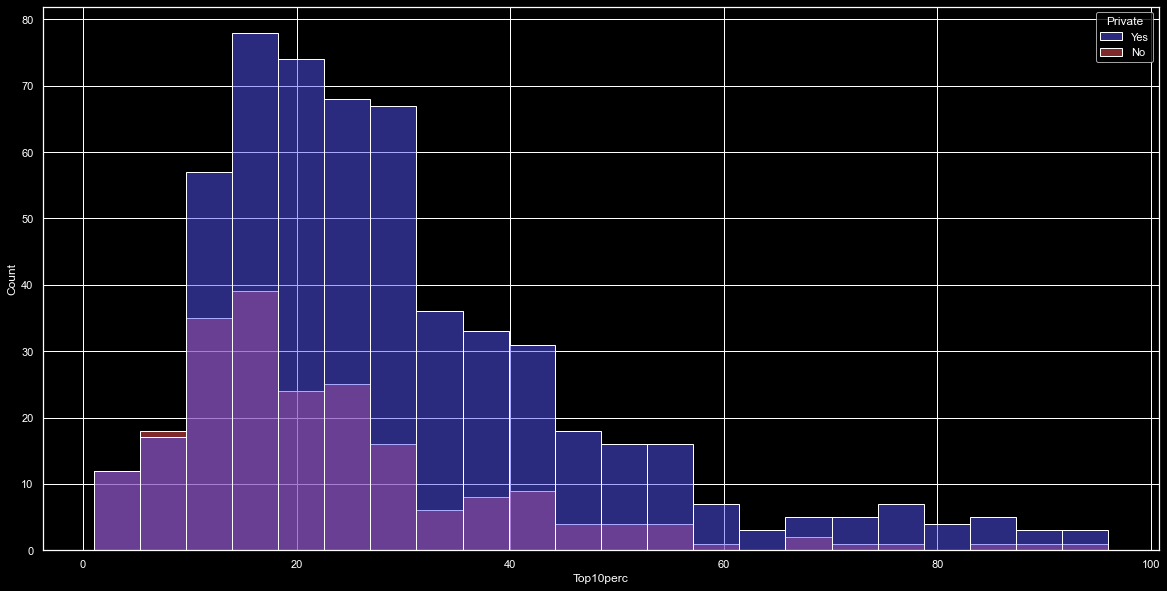

In [209]:
sns.histplot(x= 'Top10perc', data= college, hue= 'Private', palette= 'seismic')

Toppers may or may not be providing in the Grad but it seems there are more colleges in the dataset which are Private, and the toppers are there in the most of the cases. But the same distribution is followed for the NonPrivate colleges. So there is nothing to get out of it... But yes, overall grades are better of Private colleges than the NonPrivates.

# • Let's check the expenditure of the Colleges to the Students...

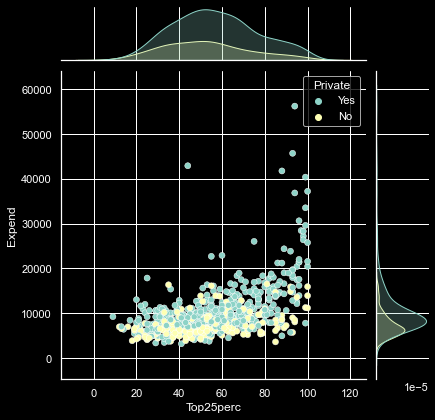

In [214]:
sns.jointplot(x= 'Top25perc', y= 'Expend', data= college, hue= "Private")

In [215]:
college[['Top25perc', 'Expend']].corr()

Top25perc    Expend
Top25perc   1.000000  0.527447
Expend      0.527447  1.000000

Kind of corr, but not good as it should be, so we can drop that idea...

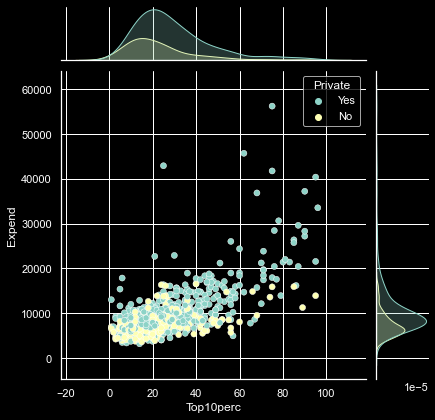

In [216]:
sns.jointplot(x= 'Top10perc', y= 'Expend', data= college, hue= "Private")

In [217]:
college[['Top10perc', 'Expend']].corr()

Top10perc    Expend
Top10perc   1.000000  0.660913
Expend      0.660913  1.000000

Yea, the `Private` college seems to spend pretty amount of money for the top 10 students... That can be contributing to their Grads...

In [221]:
college.groupby('Private')[['Top10perc', 'Expend']].corr()

Top10perc    Expend
Private                               
No      Top10perc   1.000000  0.537870
        Expend      0.537870  1.000000
Yes     Top10perc   1.000000  0.686207
        Expend      0.686207  1.000000

### Look at that! ↑ Private is actully spending 68% for their 10% students!

In [222]:
college.groupby('Private')[['Top25perc', 'Expend']].corr()

Top25perc    Expend
Private                               
No      Top25perc   1.000000  0.455746
        Expend      0.455746  1.000000
Yes     Top25perc   1.000000  0.559639
        Expend      0.559639  1.000000

### ↑ Not same for top 25 students...

# 

# 

# Enough?
There can be more, but I have to learn other things so, I am stopping myself to pause here and build one, nice, clean pair plot for further exploration. Well, it could be created before my investigation!

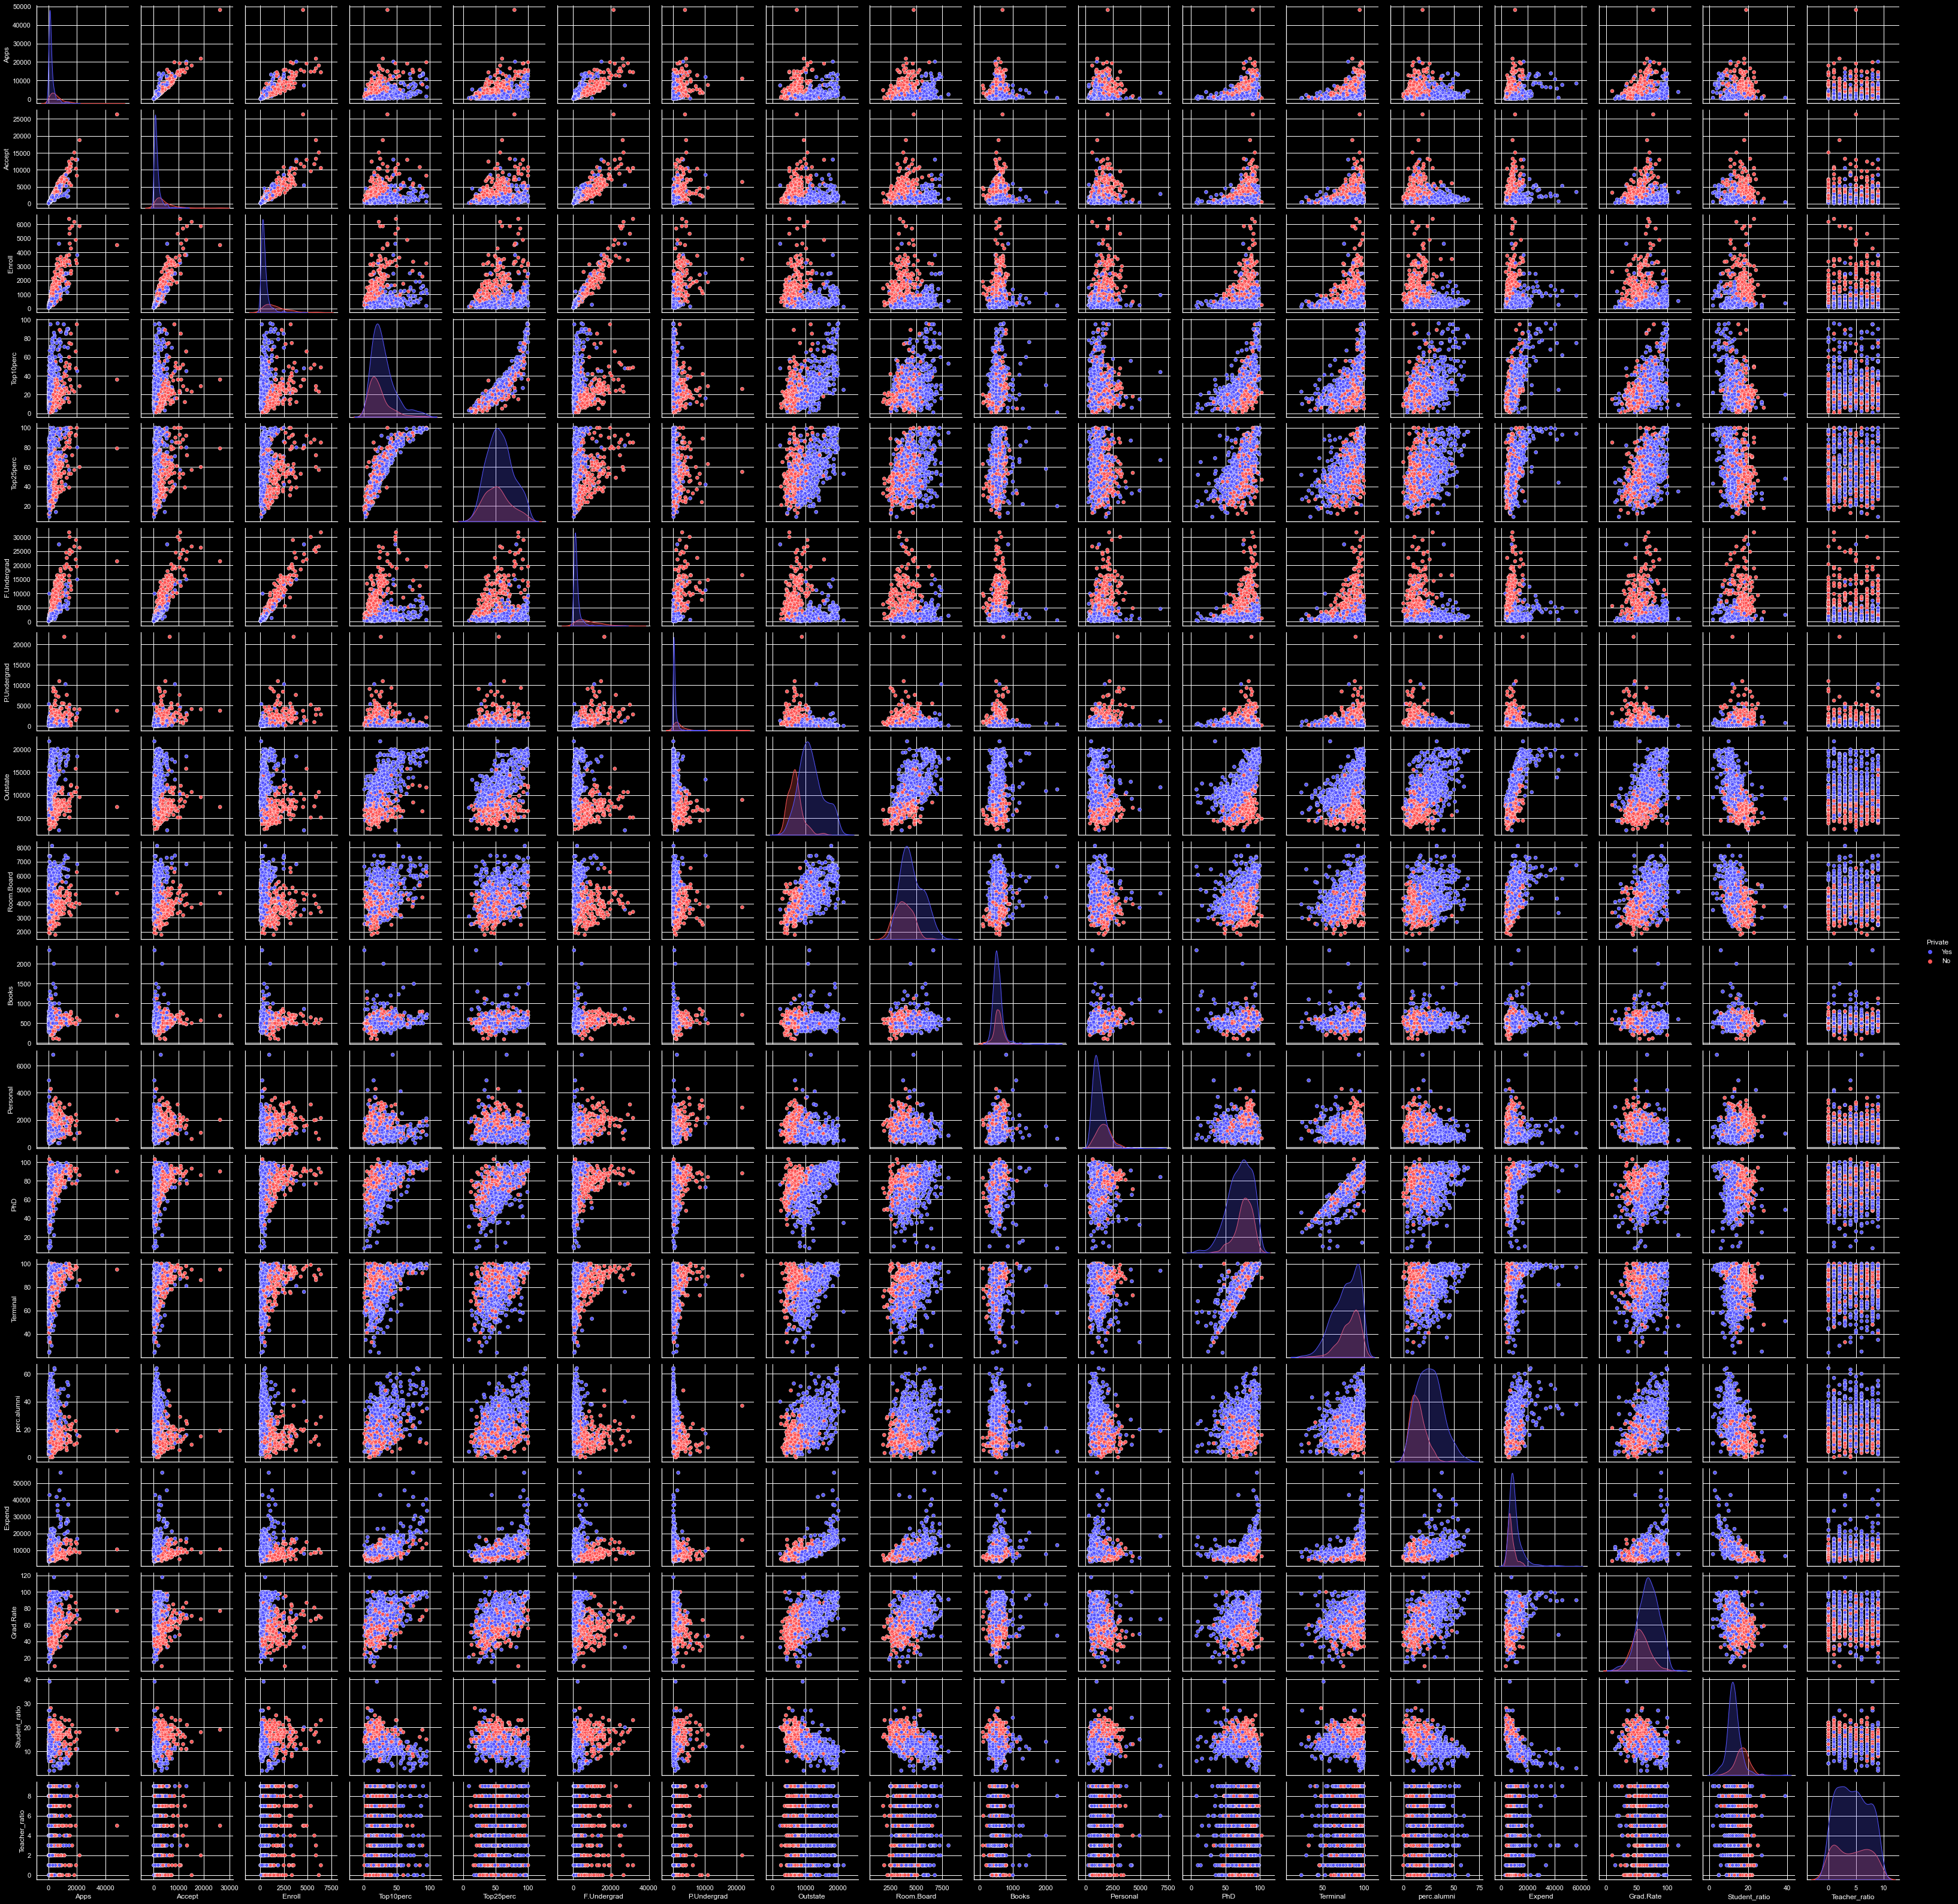

In [224]:
sns.pairplot(college, hue= "Private", palette= "seismic")

# OH! This graph says a lot!

# 

# Now, the training part...
(One thing that I forgot in the EDA, was to clean the data before getting insignts, but there is not much, so we are fine... but still we need some cleanse the data.

    See, it is 'To cleanse' the data, not 'To massage' the data. 'Massaging' comes when we want to train the model with.

As discussed above, we will use - `SVM - RFC - KNN` for this.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# For KNN

In [227]:
college_KNN = college.copy()
college_KNN

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                perc.alumni  Expend  Grad.Rate  Student_ratio  \
Abilene Christian University             12    7041         60             18   
Adelphi University                       16   10527         56             12   
Adrian College                           30    8735         54             12   
Agnes Scott College                      37   19016         59              7   
Alaska Pacific University                 2   10922         15             11   
...                                     ...     ...        ...            ...   
Worcester State College                  14    4469         40             21   
Xavier University                        31    9189         83             13   
Xavier University of Louisiana           20    8323         49             14   
Yale University                          49   40386         99              5   
York College of Pennsylvania             28    4509         99             18   

                                Teacher_ratio  
Abilene Christian University                1  
Adelphi University                          2  
Adrian College                              9  
Agnes Scott College                        

    I guess, there is no need to do Scaling, let's try it as it is...

In [242]:
X = college_KNN.drop(['Private'], axis= 1)
y = college_KNN.Private
# y = pd.get_dummies(college_KNN["Private"], drop_first= True)

In [246]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

In [247]:
model = KNeighborsClassifier(n_neighbors= 2)
model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [249]:
pred = model.predict(Xtest)

In [250]:
accuracy_score(ytest, pred)

0.9273504273504274

#### Pretty cool (without scaling)

In [251]:
from sklearn.preprocessing import StandardScaler

In [254]:
std = StandardScaler()
scaled_X_KNN = pd.DataFrame(std.fit_transform(X), columns= X.columns)
scaled_X_KNN

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  perc.alumni    Expend  Grad.Rate  Student_ratio  Teacher_ratio  
0   -0.115729    -0.867574 -0.501910  -0.318252       1.093350      -1.185438  
1   -3.378176    -0.544572  0.166110  -0.551262      -0.416036      -0.832532  
2   -0.931341     0.585935 -0.177290  -0.667767      -0.416036       1.637812  
3    1.175657     1.151188  1.792851  -0.376504      -1.673858       0.931999  
4   -0.523535    -1.675079  0.241803  -2.939613      -0.667600       1.637812  
..        ...          ...       ...        ...            ...            ...  
772 -1.339146    -0.706073 -0.994781  -1.483301       1.848042      -1.538344  
773 -0.319632     0.666685 -0.090290   1.021555      -0.164472      -0.479625  
774 -0.319632    -0.221570 -0.256241  -0.959029       0.087092      -0.126719  
775  1.107689     2.120194  5.887971   1.953595      -2.176986       1.284906  
776 -0.319632     0.424434 -0.987116   1.953595       1.093350      -1.185438  

[777 rows x 18 columns]

In [276]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_X_KNN, y, test_size= 0.3)
model = KNeighborsClassifier(n_neighbors= 2)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)
accuracy_score(ytest, pred)

0.8931623931623932

### Nah! Scaling doesn't always work...

## Trying Elbow for KNN

In [278]:
X = college_KNN.drop(['Private'], axis= 1)
y = college_KNN.Private
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)
model = KNeighborsClassifier(n_neighbors= 2)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)
accuracy_score(ytest, pred)

0.9102564102564102

In [280]:
accuracy = []
for n in range(1, 100):
    model = KNeighborsClassifier(n_neighbors= n)
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    accuracy.append(accuracy_score(ytest, pred))

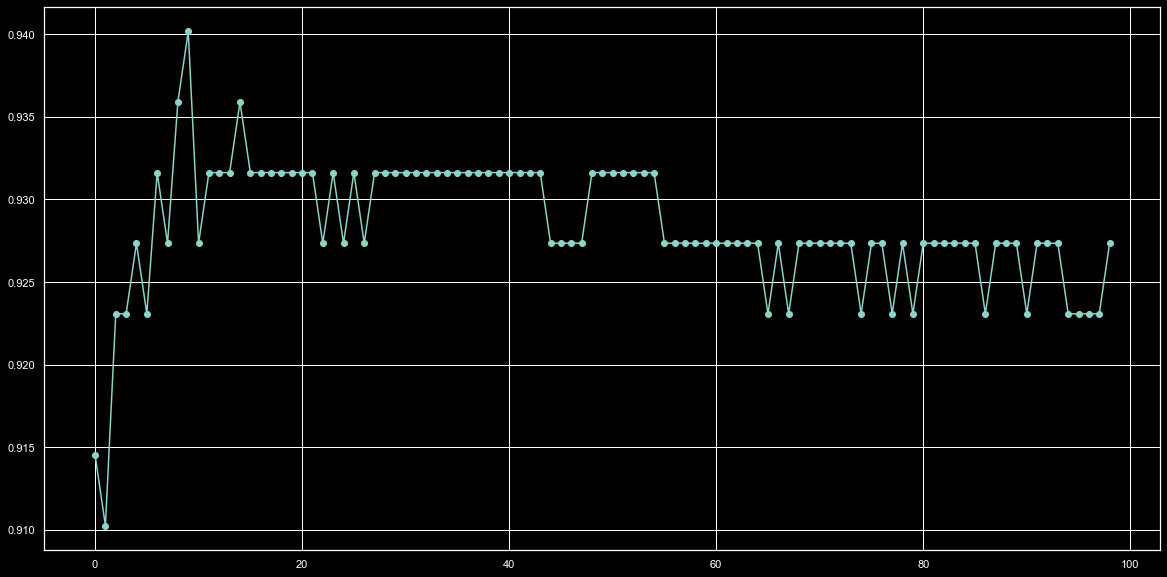

In [282]:
plt.plot(accuracy, 'o-')

# K = 8 seems to be a nice one!
Max Accuracy got for KNN is `~94%`

______

# 

# Random Forest

In [283]:
college_rfc = college.copy()

In [286]:
college_rfc

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                perc.alumni  Expend  Grad.Rate  Student_ratio  \
Abilene Christian University             12    7041         60             18   
Adelphi University                       16   10527         56             12   
Adrian College                           30    8735         54             12   
Agnes Scott College                      37   19016         59              7   
Alaska Pacific University                 2   10922         15             11   
...                                     ...     ...        ...            ...   
Worcester State College                  14    4469         40             21   
Xavier University                        31    9189         83             13   
Xavier University of Louisiana           20    8323         49             14   
Yale University                          49   40386         99              5   
York College of Pennsylvania             28    4509         99             18   

                                Teacher_ratio  
Abilene Christian University                1  
Adelphi University                          2  
Adrian College                              9  
Agnes Scott College                        

In [298]:
X = college_rfc.drop(['Private'], axis= 1)
y = college_rfc.Private
model_rfc = RandomForestClassifier(n_estimators= 200)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

model_rfc.fit(Xtrain, ytrain)
pred = model_rfc.predict(Xtest)
accuracy_score(ytest, pred)

0.9487179487179487

### Cool, it gives `~95%`

Side: trying on the same with only Single tree...

In [301]:
from sklearn.tree import DecisionTreeClassifier

X = college_rfc.drop(['Private'], axis= 1)
y = college_rfc.Private
model_rfc = DecisionTreeClassifier()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

model_rfc.fit(Xtrain, ytrain)
pred = model_rfc.predict(Xtest)
accuracy_score(ytest, pred)

0.9145299145299145

### Whops, single tree is not enough here...

____

# 

# SVM

In [11]:
college_svm = college.copy()

In [12]:
college_svm

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Abilene Christian University         18.1           12    7041         60   
Adelphi University                   12.2           16   10527         56   
Adrian College                       12.9           30    8735         54   
Agnes Scott College                   7.7           37   19016         59   
Alaska Pacific University            11.9            2   10922         15   
...                                   ...          ...     ...        ...   
Worcester State College              21.0           14    4469         40   
Xavier University                    13.3           31    9189         83   
Xavier University of Louisiana       14.4           20    8323         49   
Yale University                       5.8           49   40386         99   
York College of Pennsylvania         18.1           28    4509         99   

                                Student_ratio  Teacher_ratio  
Abilene Christian University               18              1  
Adelphi University                         12              2  
Adrian College                             12              9  
Agnes Scott College            

In [306]:
X = college_svm.drop(['Private'], axis= 1)
y = college_svm.Private
model_svc = SVC()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

model_svc.fit(Xtrain, ytrain)
pred = model_svc.predict(Xtest)
accuracy_score(ytest, pred)

0.9572649572649573

### Best till now, `~96%`

I know, I know... let's use grid search...

In [7]:
from sklearn.model_selection import GridSearchCV

In [13]:
X = college_svm.drop(['Private'], axis= 1)
y = college_svm.Private
model_svc = SVC()

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3)

In [8]:
grid = GridSearchCV(SVC(), {'C': [1, 10, 100, 1000], 'kernel': ['rbf', 'linear', 'poly']}, cv= 10, verbose= 2)

In [ ]:
grid.fit(Xtrain, ytrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


# Not doing that, just ok....

How was my first analysis? 